# <b><span style='color:#F1A424'>AutoML - Multi-Class Classification - Iris Flower Type Prediction  </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    


The Iris dataset is a classic dataset in the field of machine learning and statistics.It contains measurements of various features of iris flowers, making it a quintessential dataset for practicing classification algorithms and statistical analysis.

Here are some key details about the Iris dataset:

**Features**:

- `Sepal Length (cm)`: Measurement of the length of the outermost petal parts (sepals).
- `Sepal Width (cm)`: Measurement of the width of the sepals.
- `Petal Length (cm)`: Measurement of the length of the innermost petal parts (petals).
- `Petal Width (cm)`: Measurement of the width of the petals.

**Target Variable**:

- `Species`: The species of iris flowers. It includes three classes: `Setosa`, `Versicolor` and `Virginica`.

        
**Objective**:

The primary objective is typically to build a model that can accurately classify iris flowers into one of the three species based on the provided features.

**Challenges**:

- The dataset consists of 150 instances, with 50 instances for each of the three classes.

**Usecase**:
Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.85.
- Data imbalance handling with 'SMOTE' method.
- Feature scaling with 'range' method.
- Addition of customized value in hyperparameter 'max_depth' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("teradataml", "iris_input")

In [5]:
# Fetching in teradata dataframe
iris = DataFrame.from_table("iris_input")

In [6]:
# first 5 rows
iris.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [7]:
# Performing sampling to get 80% for trainning and 20% for testing
iris_sample = iris.sample(frac = [0.8, 0.2])

In [8]:
iris_sample.head()

id,sepal_length,sepal_width,petal_length,petal_width,species,sampleid
3,4.7,3.2,1.3,0.2,1,1
5,5.0,3.6,1.4,0.2,1,1
6,5.4,3.9,1.7,0.4,1,1
7,4.6,3.4,1.4,0.3,1,1
9,4.4,2.9,1.4,0.2,1,1
10,4.9,3.1,1.5,0.1,1,2
8,5.0,3.4,1.5,0.2,1,1
4,4.6,3.1,1.5,0.2,1,1
2,4.9,3.0,1.4,0.2,1,1
1,5.1,3.5,1.4,0.2,1,1


In [9]:
# Fetching train and test data
iris_train= iris_sample[iris_sample['sampleid'] == 1].drop('sampleid', axis=1)
iris_test = iris_sample[iris_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [10]:
# train data shape
iris_train.shape

(120, 6)

In [11]:
# test data shape
iris_test.shape

(30, 6)

In [12]:
#train dataset
iris_train.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
11,5.4,3.7,1.5,0.2,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [13]:
# test dataset
iris_test.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
22,5.1,3.7,1.5,0.4,1
30,4.7,3.2,1.6,0.2,1
31,4.8,3.1,1.6,0.2,1
36,5.0,3.2,1.2,0.2,1
41,5.0,3.5,1.3,0.3,1
45,5.1,3.8,1.9,0.4,1
40,5.1,3.4,1.5,0.2,1
27,5.0,3.4,1.6,0.4,1
18,5.1,3.5,1.4,0.3,1
10,4.9,3.1,1.5,0.1,1


In [14]:
AutoClassifier.generate_custom_config("custom_iris")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,3



Customizing Data Imbalance Handling ...

Available data sampling methods with corresponding indices:
Index 1: SMOTE
Index 2: NearMiss



Enter the corresponding index data imbalance handling method:  1



Customization of data imbalance handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  1



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  4



Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  2



Available hyperparameters for model 'xgboost' with corresponding indices:
Index 1: min_impurity
Index 2: max_depth
Index 3: min_node_size
Index 4: shrinkage_factor
Index 5: iter_num



Enter the list of hyperparameter indices for model 'xgboost':  2

Enter the index of corresponding update method for hyperparameters 'max_depth' for model 'xgboost':  2

Enter the list of value for hyperparameter 'max_depth' for model 'xgboost':  3, 4



Customization of model hyperparameter has been completed successfully.

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  3



Customization of model training phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_iris.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoClassifier instance
# Including xgboost model from default model list for training.
# Using early stopping timer criteria with value 100 sec.
# Passing custom json file to provide customized value for AutoML.

aml = AutoClassifier(include=['xgboost'],
                     verbose=2,
                     max_runtime_secs=100,
                     custom_config_file='custom_iris.json')


Received below input for customization : 
{
    "DataImbalanceIndicator": true,
    "DataImbalanceMethod": "SMOTE",
    "FeatureScalingIndicator": true,
    "FeatureScalingParam": {
        "FeatureScalingMethod": "std",
        "volatile": true
    },
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "xgboost": {
            "max_depth": {
                "Method": "REPLACE",
                "Value": [
                    3,
                    4
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 120
Total Columns in the data: 6

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
sepal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
petal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
id,INTEGER,120,0,None,0,120,0,0.0,100.0
species,INTEGER,120,0,None,0,120,0,0.0,100.0
sepal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
petal_width,FLOAT,120,0,None,0,120,0,0.0,100.0


            id  sepal_length  sepal_width  petal_length  petal_width  species
func                                                                         
min      1.000         4.300        2.200         1.000        0.100    1.000
std     43.378         0.799        0.445         1.729        0.745    0.809
25%     37.750         5.200        2.800         1.500        0.300    1.000
50%     73.500         5.750        3.000         4.300        1.300    2.000
75%    111.250         6.300        3.300         5.025        1.800    3.000
max    150.000         7.900        4.400         6.900        2.500    3.000
mean    74.150         5.810        3.055         3.718        1.177    1.983
count  120.000       120.000      120.000       120.000      120.000  120.000

Statistics of Data:


func,id,sepal_length,sepal_width,petal_length,petal_width,species
50%,73.5,5.75,3,4.3,1.3,2
count,120,120,120,120,120,120
mean,74.15,5.81,3.055,3.718,1.177,1.983
min,1,4.3,2.2,1,0.1,1
max,150,7.9,4.4,6.9,2.5,3
75%,111.25,6.3,3.3,5.025,1.8,3
25%,37.75,5.2,2.8,1.5,0.3,1
std,43.378,0.799,0.445,1.729,0.745,0.809



Target Column Distribution:


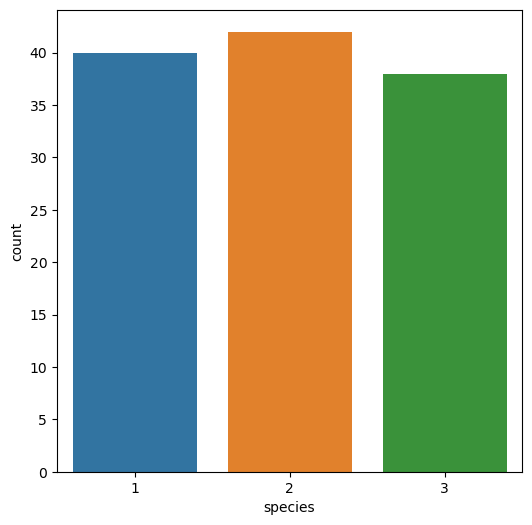

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width                2.5


Analysis completed. No action taken.                                                    


Skipping customized anti-select columns.                                                


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.                                                 


AutoML will proceed with default encoding technique.                                     


Analysis completed. No categorical columns were found.                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width                2.5


['sepal_width']


sepal_length,sepal_width,petal_length,petal_width,species,id
5.4,3.0,4.5,1.5,2,63
5.4,3.9,1.3,0.4,1,9
5.4,3.4,1.7,0.2,1,115
4.4,3.0,1.3,0.2,1,95
4.4,3.2,1.3,0.2,1,40
6.6,2.9,4.6,1.3,2,27
4.4,2.9,1.4,0.2,1,41
5.4,3.9,1.7,0.4,1,77
5.4,3.4,1.5,0.4,1,39
5.4,3.7,1.5,0.2,1,33


['sepal_width', 'petal_length', 'petal_width', 'sepal_length']


['sepal_width', 'petal_length', 'petal_width', 'sepal_length']


id,species,sepal_width,petal_length,petal_width,sepal_length
10,3,-2.0350680494119757,0.7177312821556723,0.40679582737559905,0.22565555366314133
12,2,-1.0481127674173594,-0.1618905056817609,-0.2731343412379006,-0.14795340546781913
13,2,-0.801373946918705,0.24859966197570801,0.13482375993019924,-0.27248972517814
14,3,0.43232015557456555,0.8936556397231588,1.4946840971571982,0.7238008325044227
16,2,-1.0481127674173594,0.13131675693071682,-0.0011622737925007988,-0.023417085757499345
18,2,0.6790589760732187,0.5418069245881857,0.5427818610982991,0.5992645127941018
15,3,-0.06115748542274311,0.6004483771106811,0.8147539285436989,0.22565555366314133
11,3,-0.5546351264200517,0.6590898296331769,1.0867259959890987,-0.27248972517814
9,1,2.1594918990651437,-1.4520024611766627,-1.0890505435741,-0.5215623645987796
8,2,-0.06115748542274311,0.3658825670206992,0.270809793652899,0.9728734719250622


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


['r_sepal_length', 'r_sepal_width', 'r_petal_length', 'r_petal_width']


id,species,r_sepal_length,r_sepal_width,r_petal_length,r_petal_width
10,3,0.22565555366314133,-2.0350680494119757,0.7177312821556723,0.40679582737559905
12,2,-0.14795340546781913,-1.0481127674173594,-0.1618905056817609,-0.2731343412379006
13,2,-0.27248972517814,-0.801373946918705,0.24859966197570801,0.13482375993019924
14,3,0.7238008325044227,0.43232015557456555,0.8936556397231588,1.4946840971571982
16,2,-0.023417085757499345,-1.0481127674173594,0.13131675693071682,-0.0011622737925007988
18,2,0.5992645127941018,0.6790589760732187,0.5418069245881857,0.5427818610982991
15,3,0.22565555366314133,-0.06115748542274311,0.6004483771106811,0.8147539285436989
11,3,-0.27248972517814,-0.5546351264200517,0.6590898296331769,1.0867259959890987
9,1,-0.5215623645987796,2.1594918990651437,-1.4520024611766627,-1.0890505435741
8,2,0.9728734719250622,-0.06115748542274311,0.3658825670206992,0.270809793652899


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


id,species,sepal_length,sepal_width,petal_length,petal_width
87,3,0.5992645127941051,-0.3078963059213974,1.0695799972906452,0.8147539285436984
128,3,1.7200913901869874,0.43232015557456543,1.3041458073806276,0.8147539285436984
33,1,-0.5215623645987763,1.6660142580678357,-1.3347195561316718,-1.361022611019501
39,1,-0.5215623645987763,0.9257977965718729,-1.3347195561316718,-1.089050543574101
100,3,1.0974097916353864,-1.2948515879160134,1.1868629023356365,0.8147539285436984
35,2,0.3501918733734644,-0.5546351264200516,0.5418069245881857,-0.001162273792501403
28,3,0.3501918733734644,-1.0481127674173591,1.0695799972906452,0.2708097936528984
47,2,1.4710187507663468,0.43232015557456543,0.5418069245881857,0.2708097936528984
10,3,0.22565555366314463,-2.035068049411975,0.7177312821556723,0.4067958273755985
106,3,0.4747281930837853,0.9257977965718729,0.9522970922456546,1.4946840971571977


['col_0', 'col_1']


                                                                                          
Completed customized hyperparameter update.


response_column : species                                                                                                                             
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (3, 4)
min_node_size : (1, 2)
iter_num : (10, 20)
seed : 42
Total number of models for xgboost : 384
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_2,pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000
1,2,XGBOOST_3,lasso,0.958333,0.958333,0.958333,0.958333,0.966667,0.958333,0.960234,0.9625,0.958333,0.958041
2,3,XGBOOST_1,rfe,0.958333,0.958333,0.958333,0.958333,0.966667,0.958333,0.960234,0.9625,0.958333,0.958041
3,4,XGBOOST_0,lasso,0.958333,0.958333,0.958333,0.958333,0.966667,0.958333,0.960234,0.9625,0.958333,0.958041


In [16]:
# Fitting train data
aml.fit(iris_train, iris_train.species)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_2,pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000
1,2,XGBOOST_3,lasso,0.958333,0.958333,0.958333,0.958333,0.966667,0.958333,0.960234,0.9625,0.958333,0.958041
2,3,XGBOOST_1,rfe,0.958333,0.958333,0.958333,0.958333,0.966667,0.958333,0.960234,0.9625,0.958333,0.958041
3,4,XGBOOST_0,lasso,0.958333,0.958333,0.958333,0.958333,0.966667,0.958333,0.960234,0.9625,0.958333,0.958041


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_2,pca,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [19]:
aml.model_hyperparameters(rank=1)

{'response_column': 'species',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 3,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '3', '2']}

In [20]:
aml.model_hyperparameters(rank=4)

{'response_column': 'species',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 3,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '3', '2']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [21]:
# Generating prediction on test data
prediction = aml.predict(iris_test)

Data Transformation started ...


sepal_length,sepal_width,petal_length,petal_width,species
7.4,2.8,6.1,1.9,3
7.7,3.8,6.7,2.2,3
6.5,2.8,4.6,1.5,2
5.1,2.5,3.0,1.1,2
5.0,2.0,3.5,1.0,2
6.7,3.1,5.6,2.4,3
5.1,3.4,1.5,0.2,1
5.1,3.7,1.5,0.4,1
6.3,3.3,6.0,2.5,3
7.7,2.8,6.7,2.0,3


petal_length,sepal_width,sepal_length,id,petal_width,species
1.5,3.4,5.1,10,0.2,1
3.5,2.0,5.0,14,1.0,2
5.6,3.1,6.7,22,2.4,3
5.0,3.0,6.7,15,1.7,2
6.0,3.3,6.3,9,2.5,3
6.7,2.8,7.7,17,2.0,3
6.1,2.8,7.4,8,1.9,3
5.2,3.0,6.5,16,2.0,3
5.6,3.4,6.3,11,2.4,3
1.6,3.2,4.7,19,0.2,1


id,sepal_width,petal_length,petal_width,sepal_length,species
17,2.8,6.7,2.0,7.7,3
26,3.4,1.6,0.4,5.0,1
20,2.8,4.6,1.5,6.5,2
19,3.2,1.6,0.2,4.7,1
36,2.9,4.3,1.3,6.4,2
28,3.1,4.4,1.4,6.7,2
15,3.0,5.0,1.7,6.7,2
32,2.9,4.3,1.3,6.2,2
38,3.1,1.6,0.2,4.8,1
12,3.8,6.7,2.2,7.7,3


id,species,sepal_width,petal_length,petal_width,sepal_length
38,1,0.18558133507591124,-1.2760781036091762,-1.3610226110195,-1.2687802828607015
17,3,-0.5546351264200517,1.7146359750380966,1.0867259959890987,2.3427729887385853
34,2,-1.541590408414668,-0.0446076006367697,-0.2731343412379006,-0.39702604488845983
15,2,-0.06115748542274311,0.7177312821556723,0.6787678948209989,1.097409791635383
36,2,-0.30789630592139744,0.30724111449820335,0.13482375993019924,0.7238008325044227
28,2,0.18558133507591124,0.3658825670206992,0.270809793652899,1.097409791635383
19,1,0.43232015557456555,-1.2760781036091762,-1.3610226110195,-1.3933166025710215
30,1,0.43232015557456555,-1.5106439136991585,-1.3610226110195,-1.019707643440061
26,1,0.9257977965718731,-1.2760781036091762,-1.0890505435741,-1.019707643440061
20,2,-0.5546351264200517,0.4831654720656899,0.40679582737559905,0.8483371522147425


id,sepal_length,sepal_width,petal_length,petal_width,species
22,6.7,3.1,5.6,2.4,3
36,6.4,2.9,4.3,1.3,2
28,6.7,3.1,4.4,1.4,2
19,4.7,3.2,1.6,0.2,1
38,4.8,3.1,1.6,0.2,1
12,7.7,3.8,6.7,2.2,3
15,6.7,3.0,5.0,1.7,2
32,6.2,2.9,4.3,1.3,2
17,7.7,2.8,6.7,2.0,3
34,5.5,2.4,3.7,1.0,2


id,species,r_sepal_length,r_sepal_width,r_petal_length,r_petal_width
22,3,1.097409791635383,0.18558133507591124,1.0695799972906452,1.6306701308798983
15,2,1.097409791635383,-0.06115748542274311,0.7177312821556723,0.6787678948209989
32,2,0.474728193083782,-0.30789630592139744,0.30724111449820335,0.13482375993019924
36,2,0.7238008325044227,-0.30789630592139744,0.30724111449820335,0.13482375993019924
38,1,-1.2687802828607015,0.18558133507591124,-1.2760781036091762,-1.3610226110195
12,3,2.3427729887385853,1.9127530785664895,1.7146359750380966,1.3586980634344987
19,1,-1.3933166025710215,0.43232015557456555,-1.2760781036091762,-1.3610226110195
30,1,-1.019707643440061,0.43232015557456555,-1.5106439136991585,-1.3610226110195
17,3,2.3427729887385853,-0.5546351264200517,1.7146359750380966,1.0867259959890987
34,2,-0.39702604488845983,-1.541590408414668,-0.0446076006367697,-0.2731343412379006


id,species,sepal_length,sepal_width,petal_length,petal_width
38,1,-1.2687802828606982,0.18558133507591118,-1.2760781036091762,-1.361022611019501
19,1,-1.393316602571018,0.43232015557456543,-1.2760781036091762,-1.361022611019501
30,1,-1.0197076434400576,0.43232015557456543,-1.5106439136991585,-1.361022611019501
17,3,2.3427729887385884,-0.5546351264200516,1.7146359750380966,1.0867259959890982
22,3,1.0974097916353864,0.18558133507591118,1.0695799972906452,1.6306701308798979
35,3,-0.023417085757496025,-0.8013739469187048,0.7763727346781676,0.9507399622663981
15,2,1.0974097916353864,-0.061157485422743095,0.7177312821556723,0.6787678948209983
32,2,0.4747281930837853,-0.3078963059213974,0.30724111449820335,0.13482375993019866
26,1,-1.0197076434400576,0.9257977965718729,-1.2760781036091762,-1.089050543574101
20,2,0.8483371522147457,-0.5546351264200516,0.4831654720656899,0.4067958273755985


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,species
0,26,-2.134501,0.376449,1
1,17,2.979318,0.472867,3
2,22,2.068188,0.711279,3
3,19,-2.352833,-0.238068,1
4,38,-2.222807,-0.419043,1
5,36,0.713335,0.002790,2
6,15,1.389572,0.414597,2
7,20,1.099709,-0.157185,2
8,34,0.019662,-1.592394,2
9,35,1.189404,-0.672774,3


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being picked for evaluation:
Model ID : XGBOOST_2 
Feature Selection Method : pca

Prediction : 
   id  Prediction  species    prob_1    prob_2    prob_3
0  22           3        3  0.001111  0.005453  0.993436
1  38           1        1  0.997480  0.001717  0.000803
2  36           2        2  0.003154  0.986508  0.010337
3  15           3        2  0.001111  0.005453  0.993436
4  34           2        2  0.003659  0.987273  0.009068
5  35           3        3  0.001353  0.019395  0.979252
6  20           2        2  0.003516  0.957607  0.038877
7  19           1        1  0.997480  0.001717  0.000803
8  17           3        3  0.001111  0.005453  0.993436
9  26           1        1  0.997480  0.001717  0.000803

Confusion Matrix : 


array([[10,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,Prediction,species,prob_1,prob_2,prob_3
10,1,1,0.9974796820350456,0.001716876719969664,0.0008034412449846343
12,3,3,0.0011112337307529446,0.005452541701712984,0.9934362245675341
13,2,2,0.002354870676477184,0.6354616937763028,0.36218343554722005
14,2,2,0.003658600107511803,0.9872729931172249,0.009068406775263282
16,3,3,0.0011112337307529446,0.005452541701712984,0.9934362245675341
17,3,3,0.0011112337307529446,0.005452541701712984,0.9934362245675341
15,3,2,0.0011112337307529446,0.005452541701712984,0.9934362245675341
11,3,3,0.0011112337307529446,0.005452541701712984,0.9934362245675341
9,3,3,0.0011112337307529446,0.005452541701712984,0.9934362245675341
8,3,3,0.0011112337307529446,0.005452541701712984,0.9934362245675341


In [23]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(iris_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_2 
Feature Selection Method : pca

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision  Recall        F1  Support
SeqNum                                                                                     
0               1  CLASS_1       10        0        0   1.000000   1.000  1.000000       10
2               3  CLASS_3        0        1       12   0.923077   1.000  0.960000       12
1               2  CLASS_2        0        7        0   1.000000   0.875  0.933333        8
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.966667
1       5     Macro-Precision     0.974359
2       6        Macro-Recall     0.958333
3       7            Macro-F1     0.964444
4       9     Weighted-Recall     0.966667
5      10    

In [24]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,Precision,Recall,F1,Support
0,1,CLASS_1,10,0,0,1.0,1.0,1.0,10
2,3,CLASS_3,0,1,12,0.9230769230769231,1.0,0.9600000000000001,12
1,2,CLASS_2,0,7,0,1.0,0.875,0.9333333333333333,8


In [25]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test,2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_3 
Feature Selection Method : lasso

Prediction : 
   id  Prediction  species    prob_1    prob_2    prob_3
0  38           1        1  0.998938  0.000531  0.000531
1  36           2        2  0.000962  0.998226  0.000813
2  28           2        2  0.000935  0.998252  0.000813
3  15           3        2  0.000871  0.002996  0.996133
4  17           3        3  0.000548  0.000505  0.998947
5  34           2        2  0.000818  0.998369  0.000813
6  19           1        1  0.998938  0.000531  0.000531
7  30           1        1  0.998938  0.000531  0.000531
8  26           1        1  0.998938  0.000531  0.000531
9  20           2        2  0.000942  0.998245  0.000813

Confusion Matrix : 


array([[10,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]], dtype=int64)

In [26]:
# Printing prediction
prediction.head()

id,Prediction,species,prob_1,prob_2,prob_3
10,1,1,0.9989377670822677,0.0005312951795478172,0.000530937738184492
12,3,3,0.0006801883644343667,0.0009692414607328684,0.9983505701748328
13,2,2,0.0008180359310818579,0.9983690346735865,0.0008129293953315769
14,2,2,0.0008180359310818579,0.9983690346735865,0.0008129293953315769
16,3,3,0.000543436036706532,0.0005265372144978478,0.9989300267487955
17,3,3,0.0005478504971630089,0.0005047187958750853,0.9989474307069619
15,3,2,0.0008712061087393717,0.0029962703677184187,0.9961325235235423
11,3,3,0.0006801883644343667,0.0009692414607328684,0.9983505701748328
9,3,3,0.0006801883644343667,0.0009692414607328684,0.9983505701748328
8,3,3,0.0005478504971630089,0.0005047187958750853,0.9989474307069619


In [27]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(iris_test,2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_3 
Feature Selection Method : lasso

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision  Recall        F1  Support
SeqNum                                                                                     
0               1  CLASS_1       10        0        0   1.000000   1.000  1.000000       10
2               3  CLASS_3        0        1       12   0.923077   1.000  0.960000       12
1               2  CLASS_2        0        7        0   1.000000   0.875  0.933333        8
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.966667
1       5     Macro-Precision     0.974359
2       6        Macro-Recall     0.958333
3       7            Macro-F1     0.964444
4       9     Weighted-Recall     0.966667
5      10  

In [28]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,Precision,Recall,F1,Support
2,3,CLASS_3,0,1,12,0.9230769230769231,1.0,0.9600000000000001,12
1,2,CLASS_2,0,7,0,1.0,0.875,0.9333333333333333,8
0,1,CLASS_1,10,0,0,1.0,1.0,1.0,10


In [29]:
remove_context()

True